In [ ]:
#实践训练

In [4]:
#实践1
#声明Notebook类型，必须在引入pyecharts.charts等模块前声明
from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

from pyecharts import options as opts
from pyecharts.charts import Scatter, Page
import pymysql

#连接MySQL数据库
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',password='root',db='people',charset='utf8')
cursor = conn.cursor()
sql_num = "SELECT 年份,Round(第一产业/10000,2),Round(第二产业/10000,2),Round(第三产业/10000,2) FROM gdp_total order by 年份 asc"
cursor.execute(sql_num)
sh = cursor.fetchall()
v1 = []
v2 = []
v3 = []
v4 = []
for s in sh:
    v1.append(s[0])
    v2.append(s[1])
    v3.append(s[2])
    v4.append(s[3])

#画散点图
def scatter_splitline() -> Scatter:
    c = (
        Scatter()
        .add_xaxis(v1)
        .add_yaxis("第一产业", v2,label_opts=opts.LabelOpts(is_show=False),
                  markpoint_opts=opts.MarkPointOpts(
                      data=[opts.MarkPointItem(type_="max", name="最大值")
                            #,
                      #opts.MarkPointItem(type_="min", name="最小值")
                           ]
                      ),
                  )
        .add_yaxis("第二产业", v3,label_opts=opts.LabelOpts(is_show=False),
                  markpoint_opts=opts.MarkPointOpts(
                      data=[opts.MarkPointItem(type_="max", name="最大值")
                            #,
                      #opts.MarkPointItem(type_="min", name="最小值")
                           ]
                      ),
                  )
                .add_yaxis("第三产业", v4,label_opts=opts.LabelOpts(is_show=False),
                  markpoint_opts=opts.MarkPointOpts(
                      data=[opts.MarkPointItem(type_="max", name="最大值")
                            #,
                      #opts.MarkPointItem(type_="min", name="最小值")
                           ]
                      ),
                  )
        .set_global_opts(
            title_opts=opts.TitleOpts(title="2000—2019年我国GDP构成分析",title_textstyle_opts=opts.TextStyleOpts(font_size=20)),
            xaxis_opts=opts.AxisOpts(type_="category",boundary_gap=False,
                                     axistick_opts=opts.AxisTickOpts(is_show=True),
                                     splitline_opts=opts.SplitLineOpts(is_show=True),
                                     axislabel_opts=opts.LabelOpts(font_size = 16)
               ),
            yaxis_opts=opts.AxisOpts(type_="value",min_=0.0,
                                     axistick_opts=opts.AxisTickOpts(is_show=True),
                                     splitline_opts=opts.SplitLineOpts(is_show=True),
                                     axislabel_opts=opts.LabelOpts(font_size = 16)
                                    ),
            toolbox_opts=opts.ToolboxOpts(),
            legend_opts=opts.LegendOpts(is_show=True,item_width=40,item_height=20,textstyle_opts=opts.TextStyleOpts(font_size=16),pos_right='200',legend_icon='diamond')
        )
    )
    return c

#第一次渲染时候调用load_javasrcript文件
scatter_splitline().load_javascript()
#展示数据可视化图表
scatter_splitline().render_notebook()

                 primary_value  secondary_value  tertiary_value
primary_value         1.000000         0.996118        0.976123
secondary_value       0.996118         1.000000        0.982878
tertiary_value        0.976123         0.982878        1.000000


<Figure size 864x504 with 0 Axes>

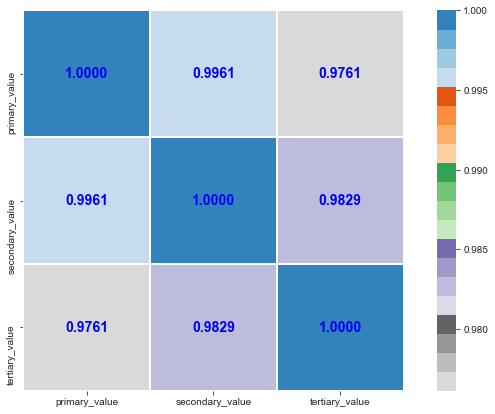

In [5]:
#实践2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
plt.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
plt.rcParams['axes.unicode_minus']=False       #正常显示负号

plt.figure(figsize=[12,7])      # 指定图片大小
sns.set_style('ticks')          #设置图形风格为ticks

#连接MySQL数据库，读取订单表数据
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',password='root',db='people',charset='utf8')
sql = "SELECT 年份 as year,Round(第一产业/10000,2) as primary_value,Round(第二产业/10000,2) as secondary_value,Round(第三产业/10000,2) as tertiary_value FROM gdp_total order by 年份 asc"
df = pd.read_sql(sql,conn)

#计算皮尔逊相关系数
corr = df[['primary_value','secondary_value','tertiary_value']].corr()
print(corr)

#绘制相关系数热力图
plt.figure(figsize=[12,7])    #指定图片大小
sns.heatmap(corr,annot=True, fmt='.4f',square=True,cmap='tab20c_r', linewidths=1.0, annot_kws={'size':14,'weight':'bold', 'color':'blue'})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

(1.4, 7.1)

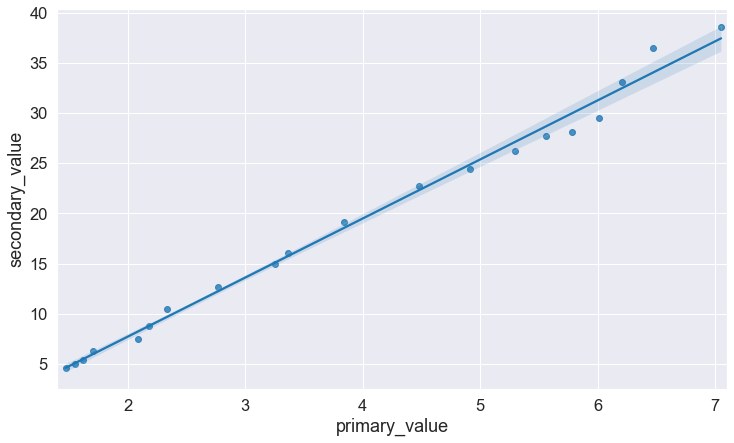

In [6]:
#实践3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql

plt.figure(figsize=[12,7])        #指定图片大小
sns.set_style('darkgrid')         #设置图形风格为darkgrid

#连接MySQL数据库，读取订单表数据
conn = pymysql.connect(host='127.0.0.1',port=3306,user='root',password='root',db='people',charset='utf8')
sql = "SELECT 年份 as year,Round(第一产业/10000,2) as primary_value,Round(第二产业/10000,2) as secondary_value,Round(第三产业/10000,2) as Tertiary_value FROM gdp_total order by 年份 asc"
df = pd.read_sql(sql,conn)

#绘制线性回归图
sns.regplot(x=df['primary_value'],y=df['secondary_value'],data=df)
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})

#设置x轴的刻度
plt.xlim(1.4,7.1)